In [4]:
%matplotlib notebook

In [5]:
import mne
from matplotlib import pyplot as plt
import numpy as np
import os.path as op
# import neurods as nds
from glob import glob
import sys

# Introduction to ECoG and EEG

## Overview
Our first class is going to cover the background of Electroencephalography (EEG) and Electrocorticography (ECoG). These are the kinds of data we'll use in the first half of this class. Below is a list of topics that we'll focus on.

## Goals for today
* Load some raw data into python
* Simple visualizations to understand the kind of data we have
* Learn some things about the data by scanning the raw values
* Introduction to the MNE library for electrophysiology

---

# Background
See the Powerpoint for this week for a quick intro to ECoG and EEG. It has some background on the history of these methods, what kinds of signals they measure, and what kinds of things we'll try to do with them.


# Visualizing electrophysiology data in python

## What is a timeseries?
In neuroscience, the most common form of data is called a *timeseries*. This essentially means that we have a sensor that collects information about some signal in the brain as it changes across time.

A timeseries can be anything from stock market fluctuations, to the changes in score during a basketball game, to electrical fluctuations in the brain.

In this course, we discuss two types of timeseries from the human brain:

1. Voltage on the brain surface, recorded from electrodes.
2. A measure of blood flow in the cortex of the brain, recorded with an fMRI machine.


## A sample timeseries
First, let's load a sample EEG timeseries so we can see what it looks like.

In [70]:
path_eeg = '/Users/choldgraf/gdrive/projects/BIDS/neuro_connector/data/eeg/epfl_p300_speller/proc/'
all_files = glob(path_eeg + '/subject1/session1/*')
path_data = all_files[0]
path_events = all_files[1]
raw = mne.io.Raw(path_data, preload=True)

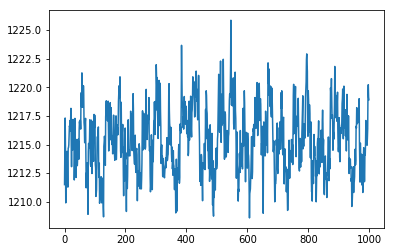

In [71]:
# First, we'll plot a single channel
fig, ax = plt.subplots()
ax.plot(raw._data[0, :1000].T)

### Sampling Frequency

The time values for this signal tell us how much time passes between observations of the signal. It's a crucial piece of information in order to do many analyses in neuroscience.

The **sampling frequency** (or sampling rate) is the number of samples we record *per second*. We can calculate this by this equation:

$sampling\_frequency = samples\_per\_second = \frac{1}{time\_between\_samples}$

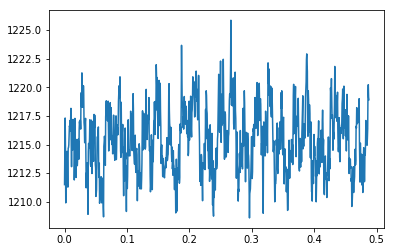

In [48]:
# We know the sampling frequency of this dataset
# How could we use it to calculate the time dimension?
time = np.arange(raw.n_times) / raw.info['sfreq']

# First, we'll plot a single channel
fig, ax = plt.subplots()
ax.plot(time[:1000], raw._data[0, :1000].T)

# Plotting a few channels

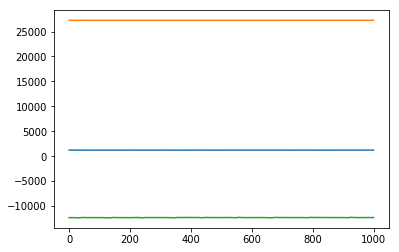

In [49]:
# Now a couple channels
data_subset = raw.copy()._data[:3, :1000]
fig, ax = plt.subplots()
ax.plot(data_subset.T)

What's wrong with the picture above? Why do they look like this?

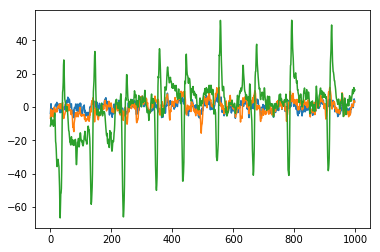

In [50]:
data_subset = data_subset - data_subset.mean(-1)[:, np.newaxis]

fig, ax = plt.subplots()
ax.plot(data_subset.T)

Now what do you notice about the channels above?

## Using MNE to represent our data
Because a timeseries has a specific structure (signals varying over time), there are a number of packages designed to handle this particular kind of data. One of the best python packages for neuroscience is called `MNE-python`. Check out their website here: http://martinos.org/mne/stable/index.html

MNE has code that can handle datasets like the one we've used above. They have a number of "classes" that handle different kinds of datasets. Here is a short-list of classes that you can use:

* `Raw` - raw data sets. (n_channels x n_times)
* `Epochs` - datasets that have been split into windows around times of interest (n_trials x n_channels x n_times_in_window)
* `Evoked` - datasets that have been averaged across trials. (n_channels x n_times_in_window)

Today, we'll focus on the `Raw` data, because it makes viewing your data much easier.

Let's explore this `Raw` dataset a little bit.

The benefit of using neuro-specific classes (like those in MNE-python) is that we can make assumptions about the data in order to allow us to do more complicated things very easily.

For example, any object that represents data in `MNE-python` will have an `info` attribute. This is a collection of information about the data at hand. It includes information like:

* `info['sfreq']` - The sampling frequency of the data
* `info['ch_names']` - The names of channels in the data
* `info['bads']` - A list of "bad" channels
* `info['chs']` - A more complex collection of channel information, such as xyz location.

There are many other pieces of information related to things that are important in EEG analysis, most of which we won't go into.

In [51]:
# Here's a list of all the things in an Info object
raw.info

<Info | 18 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'numpy.float64 | 1.0
    ch_names : 'list | Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, ...
    chs : 'list | 34 items (EEG: 34)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    file_id : 'dict | 4 items
    highpass : 'float | 0.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 1024.0 Hz
    meas_date : 'numpy.ndarray | 1969-12-31 16:00:00
    meas_id : 'dict | 4 items
    nchan : 'int | 34
    projs : 'list | 0 items
    sfreq : 'float | 2048.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    proj_id : 'NoneType
    proj_name : 'NoneType
    subje

## Plotting raw data with MNE
MNE has a lot of plotting functionality, which is one of the most important things to do in data analysis. Below we'll explore the basic ways in which we can visualize our data.

In [52]:
# To use this, we'll need to activate "interactive" mode
# This lets us keep plots interactive in the notebook

First, we'll plot the raw data. This will give us an output of traces, one for each channel. The x-axis is time (in seconds). What we are looking at is the electrical activity (voltage) recorded at the scalp, and generated by neural activity.

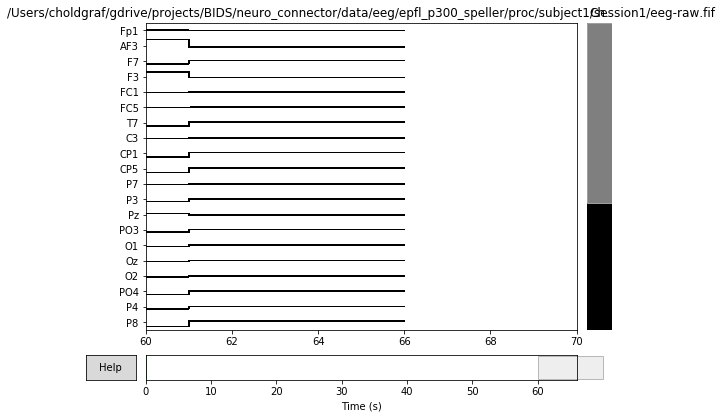

In [53]:
# Putting `_` before the equals sign tells Python to throw away the output
# Otherwise, it will make 2 plots.
_ = raw.plot(scalings='auto', start=60)

In [60]:
# We can clean up the data so that the scalings are all relatively similar
# We'll do this by applying a *high pass filter*
raw.filter(1, None)

# Next we'll crop the signal so that the last few seconds are removed
raw.crop(0, 40)

<Raw  |  eeg-raw.fif, n_channels x n_times : 34 x 81921 (40.0 sec), ~21.3 MB, data loaded>

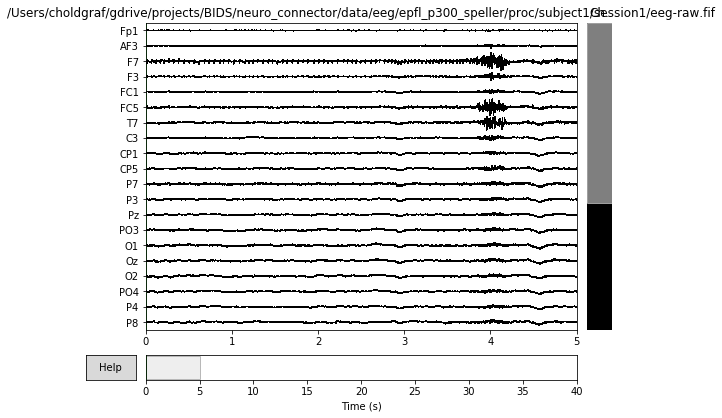

In [66]:
_ = raw.plot(scalings='auto', duration=5)

## Smoothing our data
You may notice that the signal seems to be quite noisy:

In [112]:
raw_filt = mne.io.Raw(path_data, preload=True)
ch_plt = 2

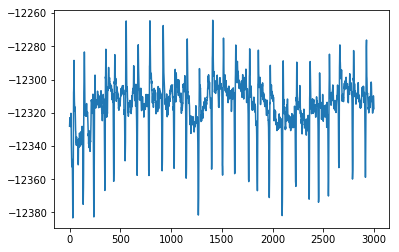

In [113]:
# First, we'll plot a single channel
fig, ax = plt.subplots()
ax.plot(raw_filt._data[ch_plt, :3000].T)

We can emphasize the fast-moving or the slow-moving parts of the signal using *filtering*.

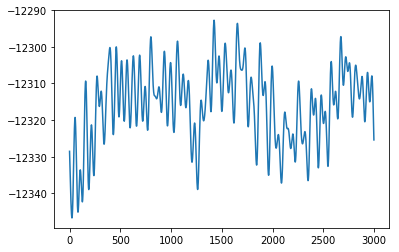

In [114]:
raw_filt.filter(None, 40)
fig, ax = plt.subplots()
ax.plot(raw_filt._data[ch_plt, :3000].T)

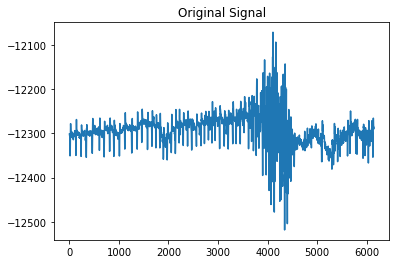

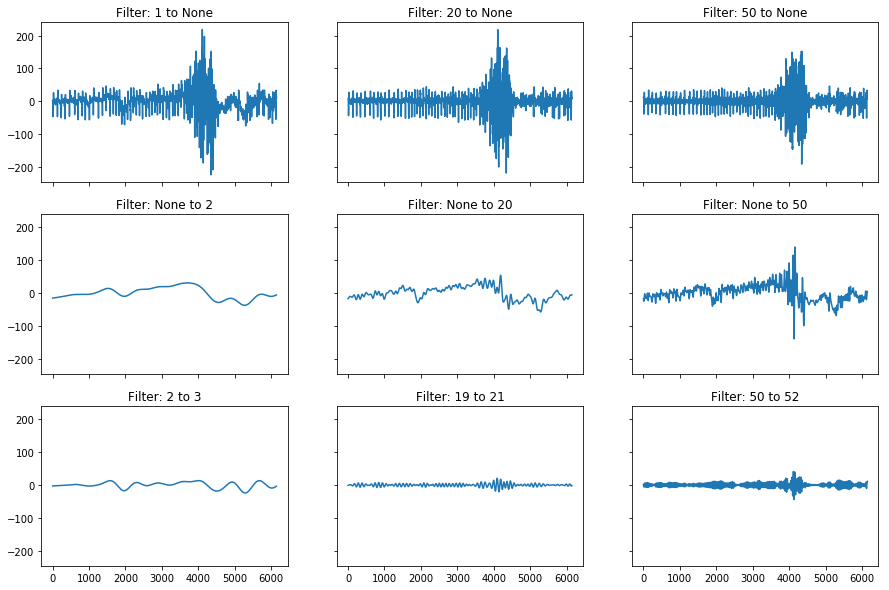

In [118]:
# Different kinds of filters produce different results:
raw_filt = mne.io.Raw(path_data, preload=True).crop(0, 20)

# These are filters we'll use on the data
filters = [(1, None), (20, None), (50, None),
           (None, 2), (None, 20), (None, 50),
           (2, 3), (19, 21), (50, 52)]

# Plot our original signal
fig, ax = plt.subplots()
ax.plot(raw_filt.copy().crop(2, 5)._data[ch_plt])
ax.set(title='Original Signal')

# Make a plot for each type of filtering
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
for ax, (fmin, fmax) in zip(axs.ravel(), filters):
    raw_plt = raw_filt.copy().filter(fmin, fmax).crop(2, 5)
    raw_plt._data = raw_plt._data - raw_plt._data.mean(-1)[:, np.newaxis]

    ax.plot(raw_plt._data[ch_plt])
    ax.set(title='Filter: {} to {}'.format(fmin, fmax))

## Plotting sensor locations
Patterns of recorded neural activity wouldn't be very useful without knowing where that activity was generated. In EEG and ECoG our sensors sit on the scalp and the surface of the brain, respectively.

MNE has simple functions for plotting the location of sensors with EEG. We can see this below:

In [20]:
%matplotlib inline

In [36]:
chs_drop = ['MA1', 'MA2']
raw.drop_channels(chs_drop)

<Raw  |  eeg-raw.fif, n_channels x n_times : 32 x 102401 (50.0 sec), ~25.1 MB, data loaded>

In [37]:
# A Montage represents the location of each electrode on the scale
mon = mne.channels.read_montage('standard_1005', raw.ch_names)
raw.set_montage(mon)

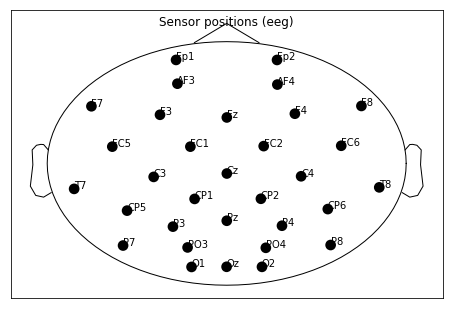

In [38]:
# We can look at the layout of channels on the brain.
# Almost all EEG setups have the same general structure.
_ = raw.plot_sensors(show_names=True)

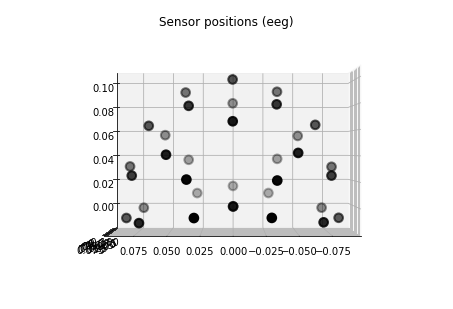

In [23]:
# We can also plot in 3d
_ = raw.plot_sensors('3d')

# Simple event slicing

In [39]:
events = mne.read_events(path_events)

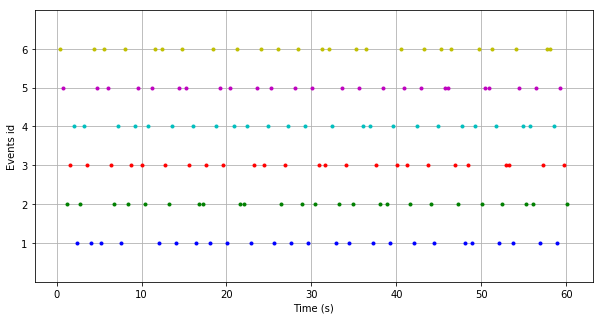

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], axes=ax)

Let's visualize our EEG data along with these events

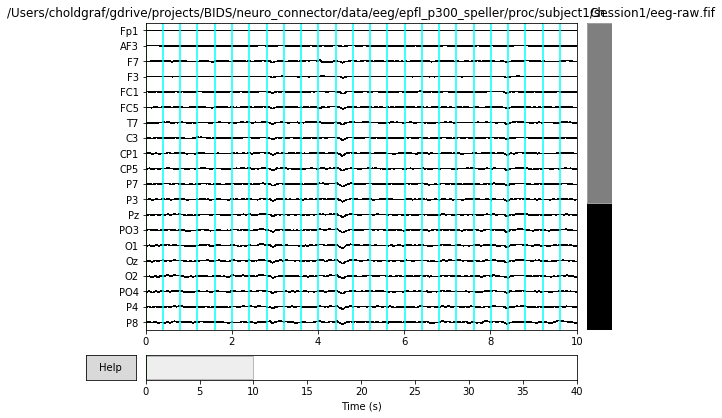

In [68]:
_ = raw.plot(events=events, scalings='auto')

# Wrapup
In this lecture we covered a couple of basic topics:
* How to visualize the raw data
* How to manipulate the raw data to highlight particular features of the data
* How to show where each channel lies on the brain
* How to note the time onsets of events in our data

These are all the basic tools that we need in order to start figuring out what the brain is doing in response to experiments that we run. The next section will cover one-such application.